In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('lab1data.csv')

# Preview the dataset
print(data.head())
print(data.info())


     Filename  target          f0   f1   f2   f3   f4   f5         f6  f7  \
0       1.png       2   50.557468  0.0  0.0  0.0  0.0  0.0   0.000000   0   
1  10.jpg.png       2  125.256027  0.0  0.0  0.0  0.0  0.0  48.989120   0   
2      10.png       2   50.160606  0.0  0.0  0.0  0.0  0.0   0.000000   0   
3     100.png       2   63.720730  0.0  0.0  0.0  0.0  0.0   0.000000   0   
4   10091.jpg       2   64.484604  0.0  0.0  0.0  0.0  0.0  37.368713   0   

   ...         f190  f191         f192         f193         f194  f195  f196  \
0  ...   316.271667   0.0   239.577011   277.834534   205.776398   0.0   0.0   
1  ...  1317.333740   0.0  1000.075012  1118.496948  1030.366699   0.0   0.0   
2  ...   330.470978   0.0   251.886398   288.062134   220.889481   0.0   0.0   
3  ...   442.839233   0.0   345.145599   389.100678   304.433990   0.0   0.0   
4  ...   835.147400   0.0   649.643616   693.101868   690.640564   0.0   0.0   

   f197  f198        f199  
0   0.0   0.0   91.438698  


In [ ]:
def check_data_types(data):
    print("Data Types of Attributes:")
    print(data.dtypes)

check_data_types(data)
check_data_types(data)


Data Types of Attributes:
Filename     object
target        int64
f0          float64
f1          float64
f2          float64
             ...   
f195        float64
f196        float64
f197        float64
f198        float64
f199        float64
Length: 202, dtype: object


In [15]:
def handle_missing_values(data):
    print("\nMissing Values in Dataset:")
    print(data.isnull().sum())
    
    # Separate numerical and non-numerical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(exclude=[np.number]).columns
    
    # Impute numerical columns with mean
    for col in numeric_cols:
        data[col].fillna(data[col].mean(), inplace=True)
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)
    
    print("\nAfter Imputation:")
    print(data.isnull().sum())

handle_missing_values(data)



Missing Values in Dataset:
Filename    0
target      0
f0          0
f1          0
f2          0
           ..
f195        0
f196        0
f197        0
f198        0
f199        0
Length: 202, dtype: int64

After Imputation:
Filename    0
target      0
f0          0
f1          0
f2          0
           ..
f195        0
f196        0
f197        0
f198        0
f199        0
Length: 202, dtype: int64


C:\Users\yasas\AppData\Local\Temp\ipykernel_18028\1122140245.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\yasas\AppData\Local\Temp\ipykernel_18028\1122140245.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Class Balance for Target Attribute:
target
1    1634
0    1055
2     564
Name: count, dtype: int64


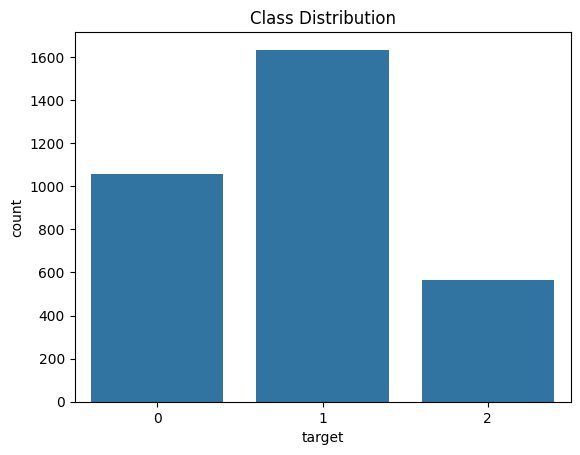

In [16]:
def check_class_balance(data, target_column):
    print("\nClass Balance for Target Attribute:")
    print(data[target_column].value_counts())
    
    # Visualize class distribution
    sns.countplot(x=target_column, data=data)
    plt.title('Class Distribution')
    plt.show()

# Replace 'target_column' with the actual name of the target column
check_class_balance(data, 'target')



Correlation Matrix:
          target        f0        f1        f2        f3        f4        f5  \
target  1.000000  0.463661 -0.722913 -0.780848 -0.746388 -0.595582 -0.757032   
f0      0.463661  1.000000 -0.135262 -0.310323 -0.380149 -0.098776 -0.390284   
f1     -0.722913 -0.135262  1.000000  0.881897  0.744823  0.930110  0.739068   
f2     -0.780848 -0.310323  0.881897  1.000000  0.961333  0.841121  0.957453   
f3     -0.746388 -0.380149  0.744823  0.961333  1.000000  0.703499  0.993130   
...          ...       ...       ...       ...       ...       ...       ...   
f195   -0.786789 -0.241574  0.953695  0.948737  0.845233  0.884773  0.836855   
f196   -0.801463 -0.276247  0.935592  0.984923  0.916102  0.857046  0.915204   
f197   -0.296790 -0.017810  0.570506  0.511914  0.413386  0.672960  0.422219   
f198   -0.742889 -0.165086  0.971878  0.862041  0.737351  0.850786  0.727451   
f199    0.116454  0.885136  0.331528  0.119751 -0.008737  0.357157 -0.023978   

              f6  

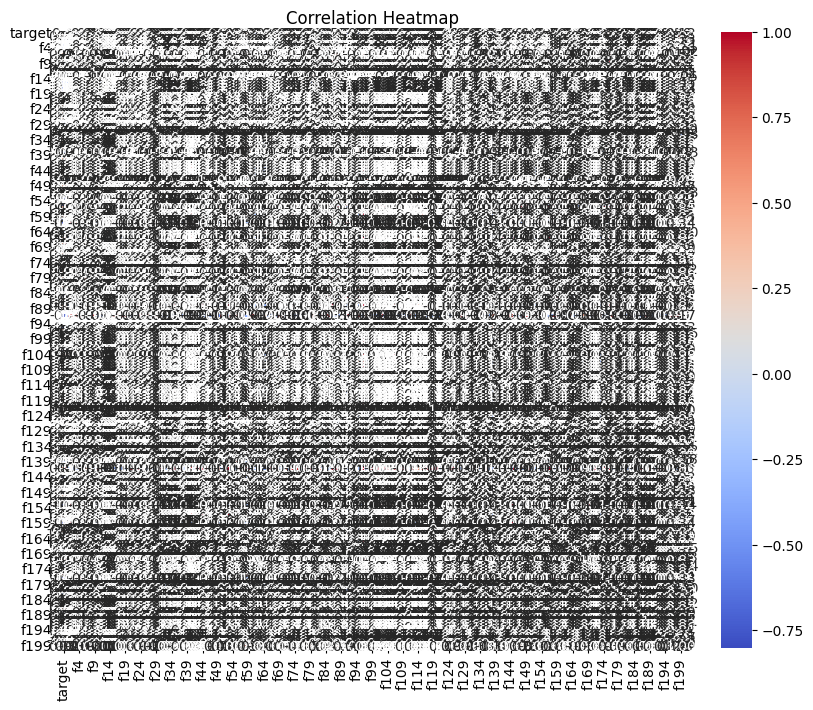

In [17]:
def plot_correlation_matrix(data):
    numeric_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_matrix(data)


In [18]:
def calculate_matrix_rank(data):
    numeric_data = data.select_dtypes(include=[np.number])
    rank = np.linalg.matrix_rank(numeric_data.values)
    print("\nMatrix Rank (Dimensionality):", rank)

calculate_matrix_rank(data)



Matrix Rank (Dimensionality): 175


In [19]:
def analyze_data_range_and_normalize(data):
    numeric_data = data.select_dtypes(include=[np.number])
    
    print("\nData Range Before Normalization:")
    print(numeric_data.describe())
    
    # Min-Max Normalization
    normalized_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())
    
    print("\nData Range After Normalization:")
    print(normalized_data.describe())
    
    return normalized_data

normalized_data = analyze_data_range_and_normalize(data)



Data Range Before Normalization:
            target           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   

In [20]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Filename', 'target'])
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2439, 200)
Test set size: (814, 200)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer

# Initialize classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Binarize the target for AUROC calculation (one-vs-rest)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)


In [22]:
import time
from sklearn.metrics import classification_report

def evaluate_fit_and_timing(classifier, X_train, X_test, y_train, y_test):
    # Training the model and recording time
    start_train = time.time()
    classifier.fit(X_train, y_train)
    end_train = time.time()
    
    # Predict on train set and record time
    start_train_pred = time.time()
    y_train_pred = classifier.predict(X_train)
    end_train_pred = time.time()
    
    # Predict on test set and record time
    start_test_pred = time.time()
    y_test_pred = classifier.predict(X_test)
    end_test_pred = time.time()
    
    # Train metrics
    train_metrics = classification_report(y_train, y_train_pred, output_dict=True)
    
    # Test metrics
    test_metrics = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Timings
    train_time = end_train - start_train
    train_prediction_time = end_train_pred - start_train_pred
    test_prediction_time = end_test_pred - start_test_pred
    
    return train_metrics, test_metrics, train_time, train_prediction_time, test_prediction_time


In [23]:
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}:")
    
    train_metrics, test_metrics, train_time, train_pred_time, test_pred_time = evaluate_fit_and_timing(
        clf, X_train, X_test, y_train, y_test
    )
    
    # Train and Test metrics comparison (accuracy, precision, recall, F1-score)
    train_accuracy = train_metrics['accuracy']
    test_accuracy = test_metrics['accuracy']
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision (Train/Test): {train_metrics['weighted avg']['precision']:.4f} / {test_metrics['weighted avg']['precision']:.4f}")
    print(f"Recall (Train/Test): {train_metrics['weighted avg']['recall']:.4f} / {test_metrics['weighted avg']['recall']:.4f}")
    print(f"F1-Score (Train/Test): {train_metrics['weighted avg']['f1-score']:.4f} / {test_metrics['weighted avg']['f1-score']:.4f}")
    
    # Check for underfit, regular fit, or overfit
    if train_accuracy < 0.8 and test_accuracy < 0.8:
        fit_status = "Underfit"
    elif abs(train_accuracy - test_accuracy) > 0.1:
        fit_status = "Overfit"
    else:
        fit_status = "Regular Fit"
    
    print(f"Model Fit Status: {fit_status}")
    
    # Timing results
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Train Prediction Time: {train_pred_time:.4f} seconds")
    print(f"Test Prediction Time: {test_pred_time:.4f} seconds")



Evaluating kNN:
Train Accuracy: 0.9405
Test Accuracy: 0.9287
Precision (Train/Test): 0.9411 / 0.9303
Recall (Train/Test): 0.9405 / 0.9287
F1-Score (Train/Test): 0.9405 / 0.9288
Model Fit Status: Regular Fit
Training Time: 0.0060 seconds
Train Prediction Time: 0.1921 seconds
Test Prediction Time: 0.0940 seconds

Evaluating Decision Tree:
Train Accuracy: 1.0000
Test Accuracy: 0.9201
Precision (Train/Test): 1.0000 / 0.9206
Recall (Train/Test): 1.0000 / 0.9201
F1-Score (Train/Test): 1.0000 / 0.9203
Model Fit Status: Regular Fit
Training Time: 0.2662 seconds
Train Prediction Time: 0.0060 seconds
Test Prediction Time: 0.0030 seconds

Evaluating SVM:
Train Accuracy: 0.9295
Test Accuracy: 0.9238
Precision (Train/Test): 0.9316 / 0.9277
Recall (Train/Test): 0.9295 / 0.9238
F1-Score (Train/Test): 0.9293 / 0.9240
Model Fit Status: Regular Fit
Training Time: 0.5690 seconds
Train Prediction Time: 0.1757 seconds
Test Prediction Time: 0.0605 seconds

Evaluating Random Forest:
Train Accuracy: 1.0000
T